## Capstone Project - Bundestag Data Set

Parliamentary debates protocols from 1949-2021

**Political Argument Assistant**

Business Goal: "what arguments where put forward in favor and against the EURO"?
   
Evaluation Metric: Accuracy?




### Questions

- data cleaning: Role vs pos_speechbeginning

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [14]:
df_debates = pd.read_csv("data/all_bundestag_speeches_replication_data.csv")

In [5]:
df_debates.shape

(877140, 13)

In [10]:
df_debates.columns.to_list()

['Unnamed: 0',
 'doc_id',
 'doc_lp_id',
 'speech_identification_ent',
 'date',
 'period',
 'session',
 'pos_speechbeginning',
 'Party',
 'Role',
 'governing_Party',
 'text',
 'text_length']

In [11]:
df_debates.head()

,Unnamed: 0,doc_id,doc_lp_id,speech_identification_ent,date,period,session,pos_speechbeginning,Party,Role,governing_Party,text,text_length
0,0,0,0,Alterspräsident Labe:,07.09.1949,1,1,\nAlterspräsident Labe:,no-text,Alterspraesident,no-text,Meine Damen und Herren! Abgeordnete des Deuts...,1670
1,1,1,1,Dr. Adenauer (CDU):,07.09.1949,1,1,\nDr. Adenauer (CDU):,CDU/CSU,MdB,1.0,Namens der Fraktion der CDU/CSU schlage ich a...,15
2,2,2,2,Alterspräsident Löbe:,07.09.1949,1,1,\nAlterspräsident Löbe:,no-text,Alterspraesident,no-text,Das Wort hat der Herr Abgeordnete Reimann.\n,7
3,3,3,3,Reimann (KPD):,07.09.1949,1,1,\nReimann (KPD):,KPD,MdB,0.0,Ich schlage im Namen der kommunistischen Frak...,22
4,4,4,4,Alterspräsident Löbe:,07.09.1949,1,1,\nAlterspräsident Löbe:,no-text,Alterspraesident,no-text,Sie haben die Vorschläge gehört: Hans Böhm un...,57


In [16]:
df_debates.describe()

,Unnamed: 0,doc_id,doc_lp_id,period,session,text_length
count,877140.000000,877140.000000,877140.000000,877140.000000,877140.000000,877140.000000
mean,438569.500000,438569.500000,25356.538075,10.675568,120.529621,245.665244
std,253208.651896,253208.651896,16277.215712,4.956654,68.088480,629.664638
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,219284.750000,219284.750000,11541.000000,7.000000,63.000000,10.000000
50%,438569.500000,438569.500000,23320.000000,11.000000,119.000000,43.000000
75%,657854.250000,657854.250000,38221.000000,15.000000,175.000000,193.000000
max,877139.000000,877139.000000,63829.000000,19.000000,282.000000,47655.000000


In [105]:
# set datetime
df_debates['date'] = pd.to_datetime(df_debates['date'], format='%d.%m.%Y')


In [104]:
df_debates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877140 entries, 0 to 877139
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Unnamed: 0                 877140 non-null  int64         
 1   doc_id                     877140 non-null  int64         
 2   doc_lp_id                  877140 non-null  int64         
 3   speech_identification_ent  877140 non-null  object        
 4   date                       877140 non-null  datetime64[ns]
 5   period                     877140 non-null  int64         
 6   session                    877140 non-null  int64         
 7   pos_speechbeginning        877140 non-null  object        
 8   Party                      877140 non-null  object        
 9   Role                       877140 non-null  object        
 10  governing_Party            875074 non-null  object        
 11  text                       875086 non-null  object  

In [49]:
roles = df_debates['Role'].unique()
roles

array(['Alterspraesident', 'MdB', 'Bundestagspraesident',
       'Schriftfuehrer', 'Bundeskanzler', 'Bundesminister',
       'Vizepraesident', 'Staatssekretär', 'Staatsminister',
       'Landesminister', 'Senator', 'Buergermeister', 'Gastredner',
       'Wehrbeauftragter', 'Beauftragter'], dtype=object)

In [106]:
df_gastredner = df_debates[df_debates['Role'] == 'Gastredner']
df_gastredner

,Unnamed: 0,doc_id,doc_lp_id,speech_identification_ent,date,period,session,pos_speechbeginning,Party,Role,governing_Party,text,text_length
24588,24588,24588,93,"Mr. Joseph W. Martin, Speaker des. Repräsentan...",1953-10-29,2,5,"\nIch bitte ihn, das Wort zu nehmen.\nMr. Jose...",no-text,Gastredner,no-text,"\nEs ist eine große Ehre für mich, vor dieser ...",1228


In [119]:
# irrelevant roles to be dropped, effectively keep same as LNKTW24
irr_roles = ['Gastredner', 'Landesminister', 'Bundestagspraesident', 'Vizepraesident', 'Alterspraesident', 'Senator', 'Buergermeister', 'Wehrbeauftragter', 'Beauftragter', 'Schriftfuehrer']

# LNKTW2024 keep only ['MdB','Bundeskanzler','Bundesminister','Staatssekretär', 'Staatsminister']


In [120]:
irr_debates = df_debates[df_debates['Role'].isin(irr_roles)].copy()
irr_debates

,Unnamed: 0,doc_id,doc_lp_id,speech_identification_ent,date,period,session,pos_speechbeginning,Party,Role,governing_Party,text,text_length
0,0,0,0,Alterspräsident Labe:,1949-09-07,1,1,\nAlterspräsident Labe:,no-text,Alterspraesident,no-text,Meine Damen und Herren! Abgeordnete des Deuts...,1670
2,2,2,2,Alterspräsident Löbe:,1949-09-07,1,1,\nAlterspräsident Löbe:,no-text,Alterspraesident,no-text,Das Wort hat der Herr Abgeordnete Reimann.\n,7
4,4,4,4,Alterspräsident Löbe:,1949-09-07,1,1,\nAlterspräsident Löbe:,no-text,Alterspraesident,no-text,Sie haben die Vorschläge gehört: Hans Böhm un...,57
6,6,6,6,Alterspräsident Löbe:,1949-09-07,1,1,\nAlterspräsident Löbe:,no-text,Alterspraesident,no-text,Die Abstimmung beginnt mit dem Namensaufruf.\...,132
7,7,7,7,Präsident Dr. Köhler:,1949-09-07,1,1,\nPräsident Dr. Köhler:,no-text,Bundestagspraesident,no-text,Meine Damen und Herren! Ich übernehme das Amt...,212
...,...,...,...,...,...,...,...,...,...,...,...,...,...
876637,876637,876637,26445,Armin Laschet,2021-06-24,19,236,Ministerpräsident (Nordrhein-Westfalen),no-text,Bundestagspraesident,0,Herr Präsident! Verehrte Damen und Herren Abge...,1308
877023,877023,877023,26831,Armin Laschet,2021-08-25,19,238,Ministerpräsident (Nordrhein-Westfalen),no-text,Bundestagspraesident,0,Frau Präsidentin! Liebe Kolleginnen und Kolleg...,865
877025,877025,877025,26833,Armin Laschet,2021-08-25,19,238,Ministerpräsident (Nordrhein-Westfalen),no-text,Bundestagspraesident,0,Das Problem ist – ich habe es ja vermutet –: S...,222
877029,877029,877029,26837,Malu Dreyer,2021-08-25,19,238,Ministerpräsidentin (Rheinland-Pfalz),no-text,Bundestagspraesident,0,Sehr verehrte Frau Präsidentin! Meine sehr ver...,1204


In [88]:
irr_debates.nunique()

Unnamed: 0                   353858
doc_id                       353858
doc_lp_id                     61996
speech_identification_ent      1508
date                           4092
period                           19
session                         282
pos_speechbeginning           67500
Party                             1
Role                             10
governing_Party                   3
text                         255053
text_length                    3350
dtype: int64

In [ ]:
# EDA todo
# speakers w/o party
# speakers w/o text

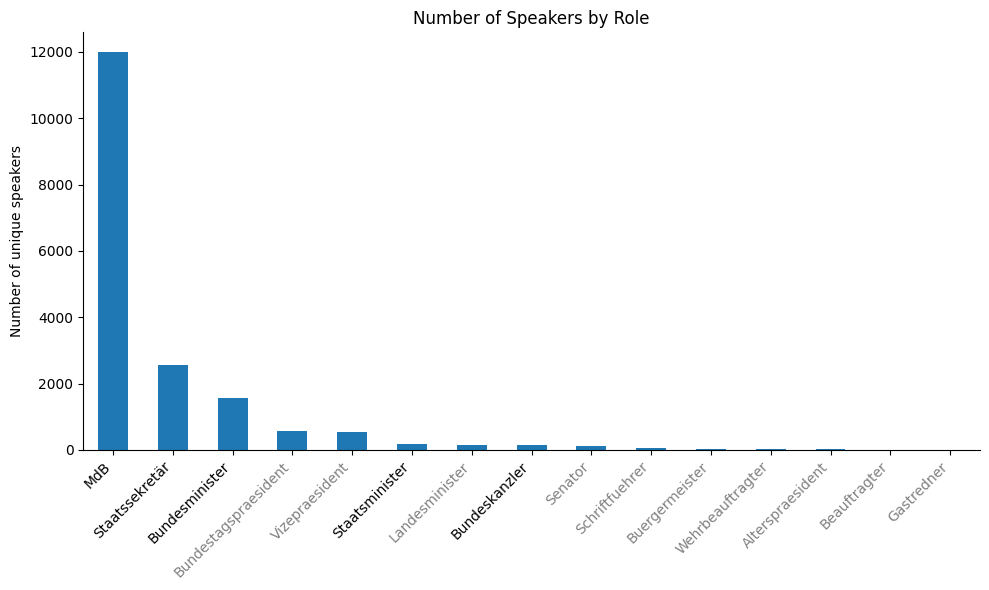

In [121]:
# df of roles
df_filtered = df_debates[df_debates['Role'].isin(roles)].copy()

# Count unique speakers per role
role_counts = (
    df_filtered
    .groupby('Role')['speech_identification_ent'] 
    .nunique()
    .sort_values(ascending=False)
)

# Plot 
plt.figure(figsize=(10,6))
ax = role_counts.plot(kind='bar')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# color code
for tick_label, role in zip(ax.get_xticklabels(), role_counts.index):
    if role in irr_roles:
        tick_label.set_color('grey')


plt.ylabel('Number of unique speakers')
plt.xlabel('')
plt.title('Number of Speakers by Role')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [116]:
# sth seems off here. So few people in 70 years?
df_debates[df_debates['Role'] == 'Bundestagspraesident']['pos_speechbeginning'].unique()

array(['\nPräsident Dr. Köhler:',
       '\nIch bestehe auf der Abstimmung über unsern Antrag.\nPräsident Dr. Köhler:',
       '\nArnold, Präsident des Bundesrats:', ...,
       'Ministerpräsidentin (Mecklenburg-Vorpommern)',
       'Ministerpräsidentin (Rheinland-Pfalz)',
       'Ministerpräsident (Nordrhein-Westfalen)'], dtype=object)

In [117]:
df_bdtpraesi = df_debates[df_debates['Role'] == 'Bundestagspraesident']

#df_bdtpraesi.sample(50)

df_bdtpraesi['speech_identification_ent'].unique()

array(['Präsident Dr. Köhler:', 'Arnold, Präsident des Bundesrats:',
       'Bundespräsident Dr. Heuss:',
       'Präsident Dr. Köhler (dem Bundespräsidenten die Hand reichend):',
       'Präsident Dr. Köhier:', 'Präsident Dr. Kahler:',
       'Präsident Dr. Köhler :', 'Präsident:',
       'Präsident Dr. Kation Zur Geschäftsordnung hat das Wort Herr Abgeordneter Bertram.\n',
       'Präsident Dr. KöhleR:', 'Präsident Dr. Mier:',
       'Präsident Dr. Köhler Herr Abgeordneter, Ihre Redezeit ist beendet.\n\n',
       'Präsident Dr. Kähler:', 'Präsident Dr.Köhler:',
       'Präsident Dr. -Köhler:', 'Präsident des Deutschen Bundesrates:',
       'Präsident Dr. Ehlers:', 'Präsident Dr. Ehlers :',
       'Präsident Dr. -Ehlers:',
       'Dr. Bartram, Ministerpräsident von Schleswig-Holstein:',
       'Präsident Dr Ehlers:', 'Präsident Dr. !Ehlers:',
       'Wohleb, Staatspräsident von Baden:',
       'Dr. Müller, Staatspräsident von WürttembergHohenzollern:',
       'Wohieb, Staatspräsident 